In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-70.17074454271635 -56.95019935636924
-72.40520729925174 8.372362459169892
19.314829213420353 -140.81163875219215
16.593651409697955 114.53237720593813
-8.120167501330798 -151.14505041137713
22.71536500549584 -41.707362383505455
-52.53855597298397 -174.36381460341775
-72.83355452340156 77.24353067215287
-73.93817533080113 -142.54367146143858
38.4133417122664 166.72944395792615
-51.86654507822118 139.30986655587634
-25.500897781153455 -150.12586831939515
80.14281002141297 37.065971018666005
88.9401476511 -110.48812389180863
-51.672445975508545 51.15978895498094
52.869135686356 88.64159675205372
-30.206884182319804 -176.90272350916544
88.45520481539012 -49.57327182971875
-65.13453647184441 -76.65317888828052
-20.781115956427286 -76.684747441841
-9.426566012543077 -154.18613815487868
-74.21251172611777 11.983506265101141
-78.63027117778527 119.6019123856305
-68.02532159848325 98.12125451588128
-41.55320614745017 -48.18734060290049
25.33040167077212 1.6730279427068808
21.282059133091025 -6

-64.45122088461514 -80.97530967045235
-59.134439779023445 -46.242597689955545
8.12130317779949 -77.89272158129062
48.32619638540032 -137.9068233855101
14.738774739461377 34.57139341279961
58.523356834245476 -50.11480910850196
1.1651774667345194 -56.65520621639442
74.63388546765356 -119.59780541200362
25.848096162241262 -37.31982860630842
52.9069096265884 152.63149227268087
6.077285347529113 80.25961483427722
24.245331081046402 -18.006983937061676
-31.62286359311083 116.33676771298923
-38.59217668911619 -89.60564185592997
12.056287332672582 26.08808436701213
-37.692801291908154 -86.90738628576653
-66.48710342554347 26.217266945227777
-23.446472866180272 166.8218060765297
71.85806735644516 114.86585891350757
34.24616201619439 -179.8563458519658
23.746113960530437 -18.540615201773676
-24.977211819674835 107.84895201430407
43.74653513684581 122.64777648922262
4.789502455749329 -97.58642493573018
-17.239114809894858 37.64563002331019
88.84883183917583 -67.73838797801096
44.67448929660375 -1

57.061295712344986 -53.32439883997414
-55.8962267560475 -33.66720176987363
23.971735933825343 147.66405862415036
84.34592627456092 -177.87823602421602
-4.901555940505901 -133.7535439177623
-84.57979796843568 117.80564112856632
48.069164055799234 63.17724554594392
61.144560858776515 13.475630002099393
-89.77006318514623 -155.92055105310035
31.39042442480705 -12.671583576060925
45.79024262526352 -149.77372667393246
45.52714766739891 102.83224175553738
7.297841364638359 -146.02176894001997
-11.518305907369495 13.699733382184945
-65.42098723157103 -135.5471683452756
-21.82555532189376 -13.744561560774997
67.12958899692555 25.650844116404016
11.070163133580849 96.18657894965884
-86.06127255558438 94.03402015667831
12.582778760218659 125.03120195803496
-64.92776508179648 -64.82463353529516
-15.455488353135763 98.75155715798002
41.342066925939406 122.58086054775771
0.6489583766956883 54.942014787313155
-6.004047826070035 0.9296409102432506
53.17980507327292 170.19850184586562
-55.897489209029

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a6b2af3955cb38c514aef67d2cc7b1f5


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | wanning
Processing Record 5 of Set 1 | faanui
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | severo-kurilsk
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | sheregesh
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | acari
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | rocha
Processing Record 21 of Set 1 | adrar
Processing Record 22 of Set 1 |

Processing Record 36 of Set 4 | abu kamal
Processing Record 37 of Set 4 | oleiros
Processing Record 38 of Set 4 | vostok
Processing Record 39 of Set 4 | oktyabrskiy
Processing Record 40 of Set 4 | tubruq
City not found. Skipping...
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | necochea
Processing Record 43 of Set 4 | karaul
City not found. Skipping...
Processing Record 44 of Set 4 | rock springs
Processing Record 45 of Set 4 | samusu
City not found. Skipping...
Processing Record 46 of Set 4 | chara
Processing Record 47 of Set 4 | misawa
Processing Record 48 of Set 4 | caramay
Processing Record 49 of Set 4 | manggar
Processing Record 50 of Set 4 | saint-francois
Processing Record 1 of Set 5 | pottsville
Processing Record 2 of Set 5 | fagersta
Processing Record 3 of Set 5 | ewing
Processing Record 4 of Set 5 | monrovia
Processing Record 5 of Set 5 | chowchilla
Processing Record 6 of Set 5 | socorro
Processing Record 7 of Set 5 | thayetmyo
Processing Record 8 

Processing Record 28 of Set 8 | torzhok
Processing Record 29 of Set 8 | antigonish
Processing Record 30 of Set 8 | juba
Processing Record 31 of Set 8 | iqaluit
Processing Record 32 of Set 8 | troitsko-pechorsk
Processing Record 33 of Set 8 | taft
Processing Record 34 of Set 8 | arucas
Processing Record 35 of Set 8 | seymchan
Processing Record 36 of Set 8 | traverse city
Processing Record 37 of Set 8 | along
Processing Record 38 of Set 8 | chernyshevskiy
Processing Record 39 of Set 8 | parli
Processing Record 40 of Set 8 | astana
Processing Record 41 of Set 8 | de-kastri
Processing Record 42 of Set 8 | talnakh
Processing Record 43 of Set 8 | ascension
Processing Record 44 of Set 8 | bengkulu
Processing Record 45 of Set 8 | sovetskiy
Processing Record 46 of Set 8 | dalvik
Processing Record 47 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 48 of Set 8 | aykhal
Processing Record 49 of Set 8 | vallenar
Processing Record 50 of Set 8 | onguday
Processing Record 1 of Set 9 |

Processing Record 14 of Set 12 | coquimbo
Processing Record 15 of Set 12 | babanusah
City not found. Skipping...
Processing Record 16 of Set 12 | ituni
City not found. Skipping...
Processing Record 17 of Set 12 | crateus
Processing Record 18 of Set 12 | naerbo
Processing Record 19 of Set 12 | setermoen
Processing Record 20 of Set 12 | olafsvik
Processing Record 21 of Set 12 | san quintin
Processing Record 22 of Set 12 | krasnoarmeysk
Processing Record 23 of Set 12 | port said
Processing Record 24 of Set 12 | ruwi
Processing Record 25 of Set 12 | witu
Processing Record 26 of Set 12 | craig
Processing Record 27 of Set 12 | takoradi
Processing Record 28 of Set 12 | springbok
Processing Record 29 of Set 12 | phalaborwa
Processing Record 30 of Set 12 | bilma
Processing Record 31 of Set 12 | bykivka
Processing Record 32 of Set 12 | abu dhabi
Processing Record 33 of Set 12 | lasa
Processing Record 34 of Set 12 | talsi
Processing Record 35 of Set 12 | yershichi
Processing Record 36 of Set 12 |

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,40.66,70,0,5.75,AR,2022-05-21 21:11:28
1,Hermanus,-34.4187,19.2345,57.31,76,28,5.10,ZA,2022-05-21 21:16:17
2,Hilo,19.7297,-155.0900,92.28,73,100,9.22,US,2022-05-21 21:12:58
3,Wanning,18.8003,110.3967,77.43,90,92,3.11,CN,2022-05-21 21:16:18
4,Faanui,-16.4833,-151.7500,80.38,71,16,9.48,PF,2022-05-21 21:16:18
5,Ponta Do Sol,32.6667,-17.1000,67.71,84,24,2.44,PT,2022-05-21 21:16:19
6,Vaini,-21.2000,-175.2000,78.96,78,40,8.05,TO,2022-05-21 21:16:19
7,Busselton,-33.6500,115.3333,58.77,80,0,10.45,AU,2022-05-21 21:16:20
8,Mataura,-46.1927,168.8643,45.79,96,100,9.53,NZ,2022-05-21 21:16:20
9,Severo-Kurilsk,50.6789,156.1250,42.80,94,97,3.56,RU,2022-05-21 21:16:21


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

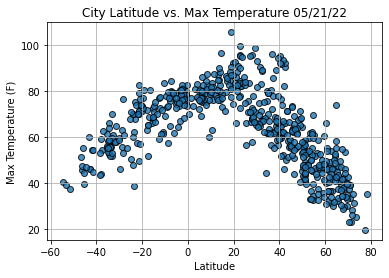

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

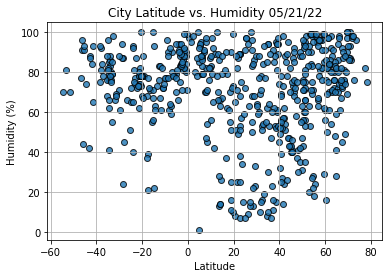

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

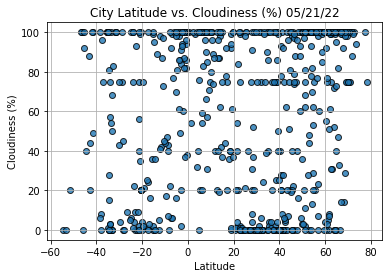

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

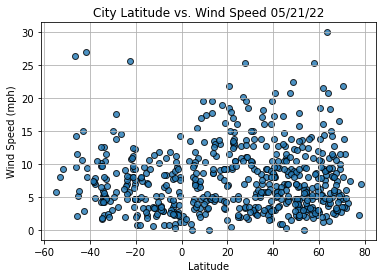

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
index13 = city_data_df.loc[13]

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


IndentationError: expected an indented block (Temp/ipykernel_11240/706127405.py, line 3)

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

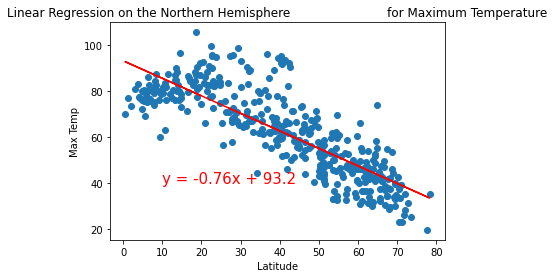

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

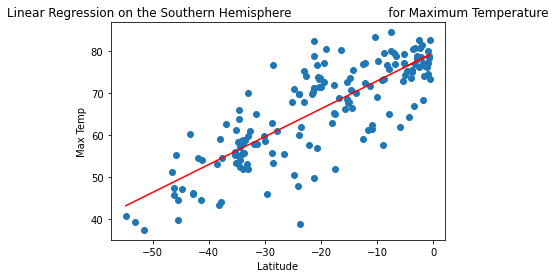

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

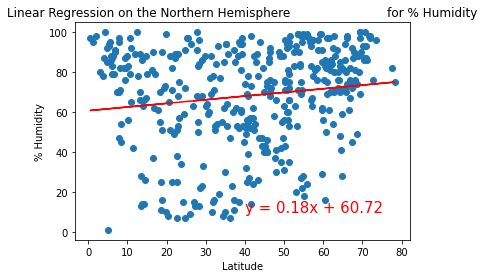

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

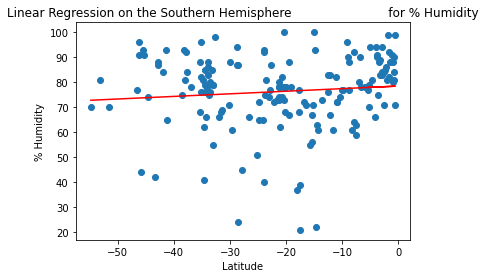

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

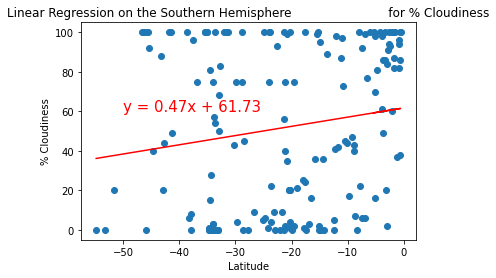

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

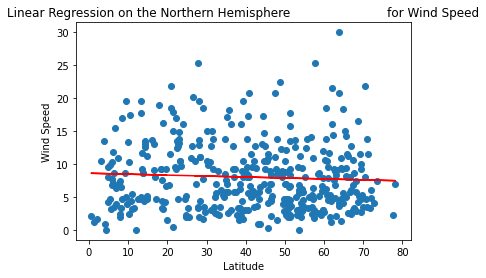

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

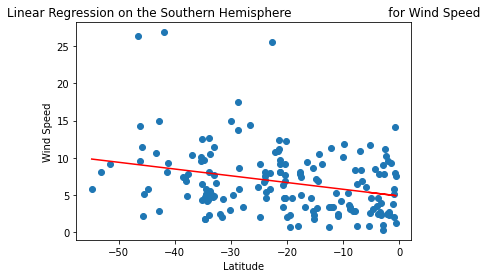

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))